In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
def sigificant_digit(number, digits=4):
    return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)

# I & II

In [3]:
with open('result/query_r/size/index_time_kd_d2.npy', 'rb') as f:
    index_time_kd1 = np.load(f)

with open('result/query_r/size/index_time_bl_d2.npy', 'rb') as f:
    index_time_bl1 = np.load(f)

with open('result/query_r/size/index_time_sn_d2.npy', 'rb') as f:
    index_time_sn1 = np.load(f)
    
with open('result/query_r/size/run_time_bf1_d2.npy', 'rb') as f:
    run_time_bf11 = np.load(f)

with open('result/query_r/size/run_time_bf2_d2.npy', 'rb') as f:
    run_time_bf21 = np.load(f)
    
with open('result/query_r/size/run_time_kd_d2.npy', 'rb') as f:
    run_time_kd1 = np.load(f)

with open('result/query_r/size/run_time_bl_d2.npy', 'rb') as f:
    run_time_bl1 = np.load(f)
    
with open('result/query_r/size/run_time_sn_d2.npy', 'rb') as f:
    run_time_sn1 = np.load(f)
    
with open('result/query_r/size/query_num_d2.npy', 'rb') as f:
    query_num1 = np.load(f)
    
with open('result/query_r/size/index_time_kd.npy', 'rb') as f:
    index_time_kd2 = np.load(f)

with open('result/query_r/size/index_time_bl.npy', 'rb') as f:
    index_time_bl2 = np.load(f)

with open('result/query_r/size/index_time_sn.npy', 'rb') as f:
    index_time_sn2 = np.load(f)
    
with open('result/query_r/size/run_time_bf1.npy', 'rb') as f:
    run_time_bf12 = np.load(f)

with open('result/query_r/size/run_time_bf2.npy', 'rb') as f:
    run_time_bf22 = np.load(f)
    
with open('result/query_r/size/run_time_kd.npy', 'rb') as f:
    run_time_kd2 = np.load(f)

with open('result/query_r/size/run_time_bl.npy', 'rb') as f:
    run_time_bl2 = np.load(f)
    
with open('result/query_r/size/run_time_sn.npy', 'rb') as f:
    run_time_sn2 = np.load(f)
    
with open('result/query_r/size/query_num.npy', 'rb') as f:
    query_num2 = np.load(f)

In [4]:
index_time_kd = (index_time_kd1 + index_time_kd2) / 2
index_time_bl = (index_time_bl1 + index_time_bl2) / 2
index_time_sn = (index_time_sn1 + index_time_sn2) / 2

In [5]:
run_time_bf1 = (run_time_bf11 + run_time_bf12) / 2
run_time_bf2 = (run_time_bf21 + run_time_bf22) / 2
run_time_kd = (run_time_kd1 + run_time_kd2) / 2
run_time_bl = (run_time_bl1 + run_time_bl2 ) / 2
run_time_sn = (run_time_sn1 + run_time_sn2) / 2

query_num_1 = (query_num1 + query_num2 ) / 2

In [6]:
print("max:", sigificant_digit(max(run_time_bl/run_time_sn)))
print("min:", sigificant_digit(min(run_time_bl/run_time_sn)))

max: 9.697
min: 5.08


In [7]:
n_samples = 2000
unit_inc = 2000

x_range = np.arange(n_samples, n_samples + 10*unit_inc, unit_inc)
print("size:", ", ".join([str(i) for i in x_range]))

size: 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000


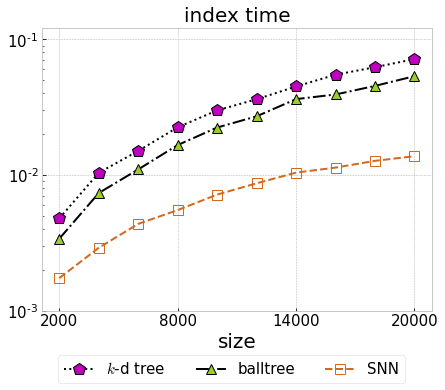

In [8]:
plt.figure(figsize=(7, 5.2))
plt.rcParams['axes.facecolor'] = 'white'
plt.semilogy(x_range,
         index_time_kd, marker="p", markerfacecolor='m',
         markersize=12, linestyle=':', c='k', linewidth=2, label='$k$-d tree', )
plt.semilogy(x_range,
         index_time_bl, marker="^", markerfacecolor='yellowgreen', 
         markersize=10, linestyle='-.', c='k', linewidth=2,label='balltree')
plt.semilogy(x_range,
         index_time_sn, marker="s", markerfacecolor='none', 
         markersize=10, linestyle='--', c='chocolate', linewidth=2,label='SNN')
plt.legend(fontsize=15, ncol=3, bbox_to_anchor=(0., 0, 0.95, -0.13))
plt.title("index time", fontsize=20)
plt.xlabel("size", fontsize=20)
plt.grid(True)
plt.ylim(0.001, max(index_time_kd)+0.05)
plt.tick_params(axis='both',  labelsize=15)
plt.xticks([ 2000,  8000,  14000, 20000]) 

plt.savefig('result/index_size_av.pdf', bbox_inches='tight')
plt.show()

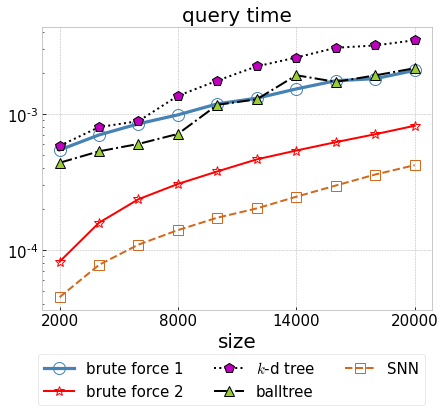

In [9]:
plt.figure(figsize=(7, 5.2))
plt.rcParams['axes.facecolor'] = 'white'
plt.semilogy(x_range, [run_time_bf1[i]/x_range[i] for i in range(len(x_range))],
         marker="o", markerfacecolor='none', markersize=12, linestyle='-',
         c='steelblue', linewidth=3.2, label='brute force 1')

plt.semilogy(x_range, [run_time_bf2[i]/x_range[i] for i in range(len(x_range))],
         marker="*", markerfacecolor='none', markersize=10, linestyle='-', 
         c='red', linewidth=2, label='brute force 2')

plt.semilogy(x_range, [run_time_kd[i]/x_range[i] for i in range(len(x_range))], 
         marker="p", markerfacecolor='m', markersize=10, linestyle=':',
         c='k', linewidth=2, label='$k$-d tree')

plt.semilogy(x_range, [run_time_bl[i]/x_range[i] for i in range(len(x_range))], 
         marker="^", markerfacecolor='yellowgreen', markersize=10, linestyle='-.',
         c='k', linewidth=2,label='balltree')

plt.semilogy(x_range, [run_time_sn[i]/x_range[i] for i in range(len(x_range))],
         marker="s", markerfacecolor='none', markersize=10, linestyle='--',
         c='chocolate', linewidth=2,label='SNN')

plt.legend(fontsize=15, ncol=3, bbox_to_anchor=(0., 0, 1, -0.13))
plt.title("query time", fontsize=20)
plt.xlabel("size", fontsize=20)
plt.grid(True)
plt.tick_params(axis='both',  labelsize=15)
plt.xticks([ 2000,  8000,  14000, 20000]) 

plt.savefig('result/run_size_av.pdf', bbox_inches='tight')
plt.show()

# III
dimensions test

In [10]:
with open('result/query_r/dim/index_time_kd.npy', 'rb') as f:
    index_time_kd = np.load(f)

with open('result/query_r/dim/index_time_bl.npy', 'rb') as f:
    index_time_bl = np.load(f)

with open('result/query_r/dim/index_time_sn.npy', 'rb') as f:
    index_time_sn = np.load(f)
    
with open('result/query_r/dim/run_time_bf1.npy', 'rb') as f:
    run_time_bf1 = np.load(f)
    
with open('result/query_r/dim/run_time_bf2.npy', 'rb') as f:
    run_time_bf2 = np.load(f)
    
with open('result/query_r/dim/run_time_kd.npy', 'rb') as f:
    run_time_kd = np.load(f)

with open('result/query_r/dim/run_time_bl.npy', 'rb') as f:
    run_time_bl = np.load(f)
    
with open('result/query_r/dim/run_time_sn.npy', 'rb') as f:
    run_time_sn = np.load(f)
    
with open('result/query_r/dim/query_num.npy', 'rb') as f:
    query_num_2 = np.load(f)

In [11]:
print("max:", sigificant_digit(max(run_time_bl/run_time_sn)))
print("min:", sigificant_digit(min(run_time_bl/run_time_sn)))

max: 5.964
min: 3.5


dim: 2, 32, 62, 92, 122, 152, 182, 212, 242, 272
number of returns: 8474.0, 7235.0, 5016.0, 4977.0, 3629.0, 2529.0, 2500.0, 2391.0, 1266.0, 148.1


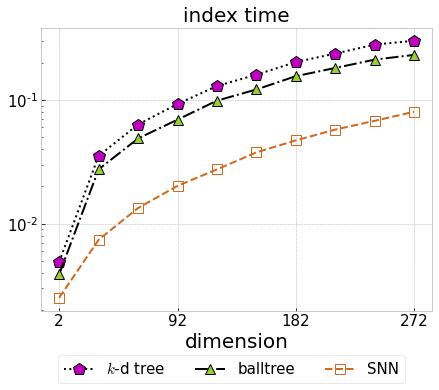

In [12]:
unit_inc = 30
n_dim =  2

x_range = np.arange(n_dim , n_dim  + 10*unit_inc, unit_inc)
print("dim:", ", ".join([str(i) for i in x_range]))

plt.figure(figsize=(7, 5.2))
plt.rcParams['axes.facecolor'] = 'white'
plt.semilogy(x_range, 
         index_time_kd, marker="p", markerfacecolor='m', markersize=12, linestyle=':', 
         c='k', linewidth=2, label='$k$-d tree', )

plt.semilogy(x_range,
         index_time_bl, marker="^", markerfacecolor='yellowgreen', markersize=10, linestyle='-.',
         c='k', linewidth=2,label='balltree')

plt.semilogy(x_range,
         index_time_sn, marker="s", markerfacecolor='none', markersize=10, linestyle='--',
         c='chocolate', linewidth=2,label='SNN')

plt.legend(fontsize=15, ncol=3, bbox_to_anchor=(0., 0, 0.95, -0.13))
plt.title("index time", fontsize=20)
plt.xlabel("dimension", fontsize=20)
plt.grid(True)
plt.tick_params(axis='both',  labelsize=15)
plt.xticks([  2,    92, 182, 272]) 

plt.savefig('result/index_dim.pdf', bbox_inches='tight')
plt.show()

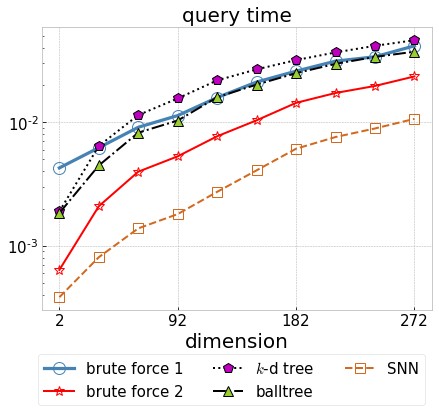

In [13]:
plt.figure(figsize=(7, 5.2))
plt.rcParams['axes.facecolor'] = 'white'
plt.semilogy(x_range,
         [run_time_bf1[i]/n_samples for i in range(len(x_range))], marker="o", markerfacecolor='none', markersize=12, linestyle='-',
         c='steelblue', linewidth=3.2, label='brute force 1')

plt.semilogy(x_range,
         [run_time_bf2[i]/n_samples for i in range(len(x_range))], marker="*", markerfacecolor='none', markersize=10, linestyle='-',
         c='red', linewidth=2, label='brute force 2')

plt.semilogy(x_range,
         [run_time_kd[i]/n_samples for i in range(len(x_range))], marker="p", markerfacecolor='m', markersize=10, linestyle=':', 
         c='k', linewidth=2, label='$k$-d tree', )

plt.semilogy(x_range,
         [run_time_bl[i]/n_samples for i in range(len(x_range))], marker="^", markerfacecolor='yellowgreen', markersize=10, linestyle='-.', 
         c='k', linewidth=2,label='balltree')

plt.semilogy(x_range,
         [run_time_sn[i]/n_samples for i in range(len(x_range))], marker="s", markerfacecolor='none', markersize=10, linestyle='--', 
         c='chocolate', linewidth=2,label='SNN')

plt.legend(fontsize=15, ncol=3, bbox_to_anchor=(0., 0, 1, -0.13))
plt.title("query time", fontsize=20)
plt.xlabel("dimension", fontsize=20)
plt.grid(True)
plt.tick_params(axis='both',  labelsize=15)
plt.xticks([  2,    92, 182, 272]) 

plt.savefig('result/run_dim.pdf', bbox_inches='tight')
plt.show()